In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id="",
    client_secret=""))

# The White Stripes

In [3]:
playlist_ws = sp.user_playlist_tracks(user="spotify", playlist_id="spotify:playlist:4rfPK92FcRDW6YwnBW0Us6")

In [5]:
playlist_ws.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [6]:
playlist_ws["items"][0]["track"]["album"]["name"]

'Icky Thump'

In [7]:
playlist_ws["items"][0]["track"]["name"]

'Icky Thump'

In [8]:
playlist_ws["items"][0]["track"]["artists"][0]["name"]

'The White Stripes'

In [9]:
playlist_ws["items"][0]["track"]["album"]["release_date"]

'2007-06-15'

In [10]:
playlist_ws["items"][0]

{'added_at': '2022-07-23T22:02:07Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/v1bb7a5e4kbhmpmr338bs12f8'},
  'href': 'https://api.spotify.com/v1/users/v1bb7a5e4kbhmpmr338bs12f8',
  'id': 'v1bb7a5e4kbhmpmr338bs12f8',
  'type': 'user',
  'uri': 'spotify:user:v1bb7a5e4kbhmpmr338bs12f8'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4F84IBURUo98rz4r61KF70'},
     'href': 'https://api.spotify.com/v1/artists/4F84IBURUo98rz4r61KF70',
     'id': '4F84IBURUo98rz4r61KF70',
     'name': 'The White Stripes',
     'type': 'artist',
     'uri': 'spotify:artist:4F84IBURUo98rz4r61KF70'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    '

In [12]:
print("The White Stripes: ", playlist_ws['total'])

The White Stripes:  86


In [11]:
for track in playlist_ws["items"]:
    print(track["track"]["name"])
    print(track["track"]["album"]["name"])
    print(track["track"]["artists"][0]["name"])
    print(track["track"]["popularity"])
    print(track["track"]["album"]["release_date"])

Icky Thump
Icky Thump
The White Stripes
67
2007-06-15
You Don't Know What Love Is (You Just Do as You're Told)
Icky Thump
The White Stripes
49
2007-06-15
300 M.P.H. Torrential Outpour Blues
Icky Thump
The White Stripes
40
2007-06-15
Conquest
Icky Thump
The White Stripes
43
2007-06-15
Bone Broke
Icky Thump
The White Stripes
41
2007-06-15
Prickly Thorn, But Sweetly Worn
Icky Thump
The White Stripes
34
2007-06-15
St. Andrew (This Battle Is In the Air)
Icky Thump
The White Stripes
31
2007-06-15
Little Cream Soda
Icky Thump
The White Stripes
42
2007-06-15
Rag and Bone
Icky Thump
The White Stripes
47
2007-06-15
I'm Slowly Turning Into You
Icky Thump
The White Stripes
42
2007-06-15
A Martyr for My Love for You
Icky Thump
The White Stripes
39
2007-06-15
Catch Hell Blues
Icky Thump
The White Stripes
49
2007-06-15
Effect and Cause
Icky Thump
The White Stripes
37
2007-06-15
Blue Orchid
Get Behind Me Satan
The White Stripes
66
2005-06-07
The Nurse
Get Behind Me Satan
The White Stripes
34
2005-06-0

In [12]:
track_list = []

for track in playlist_ws["items"]:
    track_dict = {}
    track_dict["Title"] = track["track"]["name"]
    track_dict["Album"] = track["track"]["album"]["name"]
    track_dict["Artist"] = track["track"]["artists"][0]["name"]
    track_dict["Popularity"] = track["track"]["popularity"]
    track_dict['Date'] = track["track"]["album"]["release_date"]
    track_dict['Audio Description'] = sp.audio_features(track['track']['id'])
    track_list.append(track_dict)
    
print(track_list)

[{'Title': 'Icky Thump', 'Album': 'Icky Thump', 'Artist': 'The White Stripes', 'Popularity': 67, 'Date': '2007-06-15', 'Audio Description': [{'danceability': 0.417, 'energy': 0.63, 'key': 9, 'loudness': -7.24, 'mode': 1, 'speechiness': 0.0898, 'acousticness': 0.0209, 'instrumentalness': 0.0134, 'liveness': 0.0543, 'valence': 0.341, 'tempo': 94.214, 'type': 'audio_features', 'id': '2LMq1O0NiqGhPOlXo3McYQ', 'uri': 'spotify:track:2LMq1O0NiqGhPOlXo3McYQ', 'track_href': 'https://api.spotify.com/v1/tracks/2LMq1O0NiqGhPOlXo3McYQ', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2LMq1O0NiqGhPOlXo3McYQ', 'duration_ms': 254533, 'time_signature': 4}]}, {'Title': "You Don't Know What Love Is (You Just Do as You're Told)", 'Album': 'Icky Thump', 'Artist': 'The White Stripes', 'Popularity': 49, 'Date': '2007-06-15', 'Audio Description': [{'danceability': 0.423, 'energy': 0.757, 'key': 9, 'loudness': -5.646, 'mode': 1, 'speechiness': 0.0519, 'acousticness': 0.028, 'instrumentalness': 4.46e

In [13]:
df_ws_raw = pd.DataFrame(track_list)

In [14]:
df_ws_raw.head(5)

,Title,Album,Artist,Popularity,Date,Audio Description
0,Icky Thump,Icky Thump,The White Stripes,67,2007-06-15,"[{'danceability': 0.417, 'energy': 0.63, 'key'..."
1,You Don't Know What Love Is (You Just Do as Yo...,Icky Thump,The White Stripes,49,2007-06-15,"[{'danceability': 0.423, 'energy': 0.757, 'key..."
2,300 M.P.H. Torrential Outpour Blues,Icky Thump,The White Stripes,40,2007-06-15,"[{'danceability': 0.539, 'energy': 0.435, 'key..."
3,Conquest,Icky Thump,The White Stripes,43,2007-06-15,"[{'danceability': 0.473, 'energy': 0.759, 'key..."
4,Bone Broke,Icky Thump,The White Stripes,41,2007-06-15,"[{'danceability': 0.278, 'energy': 0.793, 'key..."


In [18]:
def gimme_first(x):
    return x[0]

df_ws = pd.json_normalize(df_ws_raw['Audio Description'].apply(gimme_first))

In [19]:
df_ws.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.417,0.630,9,-7.240,1,0.0898,0.0209,0.013400,0.0543,0.341,94.214,audio_features,2LMq1O0NiqGhPOlXo3McYQ,spotify:track:2LMq1O0NiqGhPOlXo3McYQ,https://api.spotify.com/v1/tracks/2LMq1O0NiqGh...,https://api.spotify.com/v1/audio-analysis/2LMq...,254533,4
1,0.423,0.757,9,-5.646,1,0.0519,0.0280,0.000045,0.1620,0.573,83.295,audio_features,2PVq6RRjQpycXb6yQEkHHt,spotify:track:2PVq6RRjQpycXb6yQEkHHt,https://api.spotify.com/v1/tracks/2PVq6RRjQpyc...,https://api.spotify.com/v1/audio-analysis/2PVq...,234400,4
2,0.539,0.435,9,-10.818,1,0.0845,0.5850,0.026100,0.1070,0.228,85.591,audio_features,6EZiB3Cb8WI4GNADA5y9cF,spotify:track:6EZiB3Cb8WI4GNADA5y9cF,https://api.spotify.com/v1/tracks/6EZiB3Cb8WI4...,https://api.spotify.com/v1/audio-analysis/6EZi...,328560,4
3,0.473,0.759,7,-4.890,1,0.0700,0.0523,0.004940,0.1140,0.455,136.947,audio_features,53ofSOPSvejQkQQLhpEN6X,spotify:track:53ofSOPSvejQkQQLhpEN6X,https://api.spotify.com/v1/tracks/53ofSOPSvejQ...,https://api.spotify.com/v1/audio-analysis/53of...,168307,4
4,0.278,0.793,1,-6.217,0,0.1430,0.1000,0.842000,0.0801,0.404,82.263,audio_features,4jj9kdjkqm7nmkTdV1DXA7,spotify:track:4jj9kdjkqm7nmkTdV1DXA7,https://api.spotify.com/v1/tracks/4jj9kdjkqm7n...,https://api.spotify.com/v1/audio-analysis/4jj9...,194360,4


In [20]:
white_stripes_df = pd.merge(df_ws_raw, df_ws, left_index=True, right_index=True)

In [21]:
white_stripes_df.head(1)

,Title,Album,Artist,Popularity,Date,Audio Description,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Icky Thump,Icky Thump,The White Stripes,67,2007-06-15,"[{'danceability': 0.417, 'energy': 0.63, 'key'...",0.417,0.63,9,-7.24,...,0.0543,0.341,94.214,audio_features,2LMq1O0NiqGhPOlXo3McYQ,spotify:track:2LMq1O0NiqGhPOlXo3McYQ,https://api.spotify.com/v1/tracks/2LMq1O0NiqGh...,https://api.spotify.com/v1/audio-analysis/2LMq...,254533,4


In [22]:
white_stripes_df.drop('Audio Description', axis=1, inplace=True)

In [23]:
white_stripes_df.columns

Index(['Title', 'Album', 'Artist', 'Popularity', 'Date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [24]:
white_stripes_df.drop(['id', 'type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [25]:
white_stripes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             86 non-null     object 
 1   Album             86 non-null     object 
 2   Artist            86 non-null     object 
 3   Popularity        86 non-null     int64  
 4   Date              86 non-null     object 
 5   danceability      86 non-null     float64
 6   energy            86 non-null     float64
 7   key               86 non-null     int64  
 8   loudness          86 non-null     float64
 9   mode              86 non-null     int64  
 10  speechiness       86 non-null     float64
 11  acousticness      86 non-null     float64
 12  instrumentalness  86 non-null     float64
 13  liveness          86 non-null     float64
 14  valence           86 non-null     float64
 15  tempo             86 non-null     float64
 16  duration_ms       86 non-null     int64  
 17 

In [26]:
white_stripes_df['Album'].value_counts()

The White Stripes      17
White Blood Cells      16
Elephant               14
Get Behind Me Satan    13
De Stijl               13
Icky Thump             13
Name: Album, dtype: int64

In [35]:
white_stripes_df.sort_values('Popularity', ascending=False).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
26,Seven Nation Army,Elephant,The White Stripes,84,2003-04-01,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,232107,4
43,Fell In Love With a Girl,White Blood Cells,The White Stripes,71,2001-07-03,0.356,0.982,4,-1.574,0,0.1120,0.71300,0.001450,0.9410,0.299,95.754,110093,4
0,Icky Thump,Icky Thump,The White Stripes,67,2007-06-15,0.417,0.630,9,-7.240,1,0.0898,0.02090,0.013400,0.0543,0.341,94.214,254533,4
48,We're Going to Be Friends,White Blood Cells,The White Stripes,66,2001-07-03,0.534,0.441,7,-5.752,1,0.0303,0.66100,0.000000,0.0934,0.439,97.009,140179,4
13,Blue Orchid,Get Behind Me Satan,The White Stripes,66,2005-06-07,0.481,0.645,10,-8.535,0,0.3180,0.08630,0.000006,0.3320,0.612,151.307,157560,4
34,The Hardest Button to Button,Elephant,The White Stripes,63,2003-04-01,0.694,0.515,4,-8.663,0,0.0736,0.00666,0.622000,0.0884,0.566,128.246,212888,4
33,Ball and Biscuit,Elephant,The White Stripes,58,2003-04-01,0.506,0.655,9,-7.210,1,0.1640,0.02780,0.173000,0.1020,0.612,77.406,438551,4
15,My Doorbell,Get Behind Me Satan,The White Stripes,57,2005-06-07,0.614,0.663,8,-9.965,1,0.0352,0.29000,0.006820,0.0986,0.823,97.083,241867,4
40,Dead Leaves and the Dirty Ground,White Blood Cells,The White Stripes,57,2001-07-03,0.305,0.628,9,-3.573,0,0.0348,0.46000,0.000037,0.0899,0.428,80.389,182168,4
29,I Just Don't Know What to Do With Myself,Elephant,The White Stripes,54,2003-04-01,0.405,0.741,0,-7.760,1,0.1030,0.41600,0.000000,0.1120,0.406,94.097,166467,4


In [36]:
white_stripes_df.sort_values('Popularity', ascending=True).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
83,Slicker Drips,The White Stripes,The White Stripes,29,1999-06-15,0.253,0.976,2,-2.419,0,0.3920,0.240000,0.261000,0.0984,0.7370,60.347,90600,4
82,Little People,The White Stripes,The White Stripes,29,1999-06-15,0.633,0.740,9,-4.752,0,0.0588,0.803000,0.083400,0.3610,0.4930,112.983,142200,4
66,"Jumble, Jumble",De Stijl,The White Stripes,30,2000-06-20,0.424,0.922,6,-6.718,1,0.1210,0.475000,0.210000,0.2720,0.7110,171.414,113600,4
64,Boy's Best Friend,De Stijl,The White Stripes,31,2000-06-20,0.335,0.368,3,-10.521,1,0.0336,0.295000,0.000527,0.1270,0.1080,147.046,262080,3
6,St. Andrew (This Battle Is In the Air),Icky Thump,The White Stripes,31,2007-06-15,0.228,0.890,2,-5.348,1,0.1770,0.000108,0.741000,0.1290,0.2710,78.980,109507,4
74,Wasting My Time,The White Stripes,The White Stripes,32,1999-06-15,0.501,0.621,9,-3.301,1,0.0342,0.901000,0.789000,0.3450,0.3070,75.932,133787,4
25,I'm Lonely (But I Ain't That Lonely Yet),Get Behind Me Satan,The White Stripes,33,2005-06-07,0.478,0.170,0,-13.413,1,0.0497,0.986000,0.004920,0.1040,0.1680,98.972,259573,3
62,"Sister, Do You Know My Name?",De Stijl,The White Stripes,33,2000-06-20,0.402,0.360,3,-9.735,1,0.0325,0.481000,0.000830,0.0803,0.3710,69.985,171840,4
79,Do,The White Stripes,The White Stripes,33,1999-06-15,0.511,0.631,4,-5.170,1,0.0370,0.849000,0.000109,0.1030,0.5210,69.775,185000,4
54,I Can Learn,White Blood Cells,The White Stripes,34,2001-07-03,0.280,0.512,9,-4.277,1,0.0355,0.672000,0.044500,0.1340,0.0766,68.683,211800,4


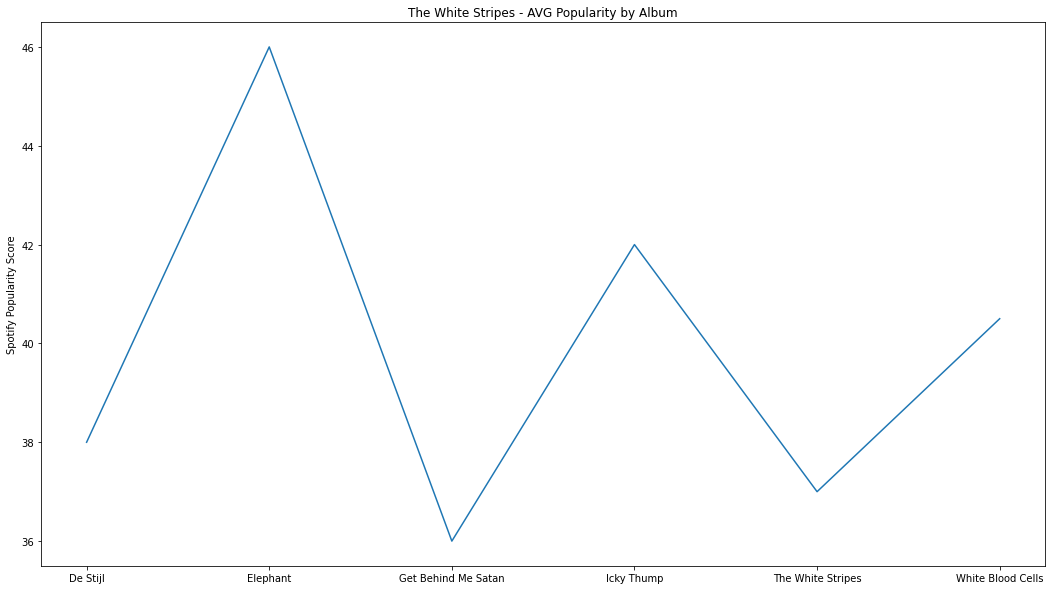

In [37]:
plt.figure(figsize=(18,10))  
plt.title("The White Stripes - AVG Popularity by Album")
plt.plot(white_stripes_df.groupby(white_stripes_df["Album"]).agg({'Popularity': ['median']}))
plt.ylabel('Spotify Popularity Score');

# Jack White 

In [40]:
jw_playlist = sp.user_playlist_tracks(user="kakkia", playlist_id="spotify:playlist:763yPJ31W7BCIIMsw21zHJ")

In [41]:
solo = []

for track in jw_playlist["items"]:
    track_dict = {}
    track_dict["Title"] = track["track"]["name"]
    track_dict["Album"] = track["track"]["album"]["name"]
    track_dict["Artist"] = track["track"]["artists"][0]["name"]
    track_dict["Popularity"] = track["track"]["popularity"]
    track_dict['Date'] = track["track"]["album"]["release_date"]
    track_dict['Audio Description'] = sp.audio_features(track['track']['id'])
    solo.append(track_dict)

In [42]:
jw_raw = pd.DataFrame(solo)

In [43]:
def gimme_first(x):
    return x[0]

df_jw = pd.json_normalize(jw_raw['Audio Description'].apply(gimme_first))

In [44]:
jack_white_df = pd.merge(jw_raw, df_jw, left_index=True, right_index=True)
jack_white_df.head(5)

,Title,Album,Artist,Popularity,Date,Audio Description,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Taking Me Back,Fear Of The Dawn,Jack White,57,2022-04-08,"[{'danceability': 0.674, 'energy': 0.73, 'key'...",0.674,0.730,7,-6.766,...,0.1130,0.419,116.987,audio_features,37FjxvMhMjt3YRecpx7HsC,spotify:track:37FjxvMhMjt3YRecpx7HsC,https://api.spotify.com/v1/tracks/37FjxvMhMjt3...,https://api.spotify.com/v1/audio-analysis/37Fj...,239104,4
1,Fear Of The Dawn,Fear Of The Dawn,Jack White,54,2022-04-08,"[{'danceability': 0.285, 'energy': 0.923, 'key...",0.285,0.923,0,-6.701,...,0.5250,0.160,139.211,audio_features,3FOcAGYwW2lKkqO6ffuJdX,spotify:track:3FOcAGYwW2lKkqO6ffuJdX,https://api.spotify.com/v1/tracks/3FOcAGYwW2lK...,https://api.spotify.com/v1/audio-analysis/3FOc...,122901,4
2,The White Raven,Fear Of The Dawn,Jack White,51,2022-04-08,"[{'danceability': 0.599, 'energy': 0.676, 'key...",0.599,0.676,9,-7.332,...,0.0938,0.586,149.786,audio_features,3C1ELJIcYJUOCp7L9Ogk6T,spotify:track:3C1ELJIcYJUOCp7L9Ogk6T,https://api.spotify.com/v1/tracks/3C1ELJIcYJUO...,https://api.spotify.com/v1/audio-analysis/3C1E...,163575,4
3,Hi-De-Ho,Fear Of The Dawn,Jack White,54,2022-04-08,"[{'danceability': 0.685, 'energy': 0.576, 'key...",0.685,0.576,7,-6.852,...,0.1100,0.362,113.797,audio_features,0LlnJ2EWpASLpjvtSQ8Yjd,spotify:track:0LlnJ2EWpASLpjvtSQ8Yjd,https://api.spotify.com/v1/tracks/0LlnJ2EWpASL...,https://api.spotify.com/v1/audio-analysis/0Lln...,236536,4
4,Eosophobia,Fear Of The Dawn,Jack White,49,2022-04-08,"[{'danceability': 0.533, 'energy': 0.612, 'key...",0.533,0.612,4,-6.907,...,0.1240,0.389,140.586,audio_features,0YBfKLk3Edwu4sY0iyIYsd,spotify:track:0YBfKLk3Edwu4sY0iyIYsd,https://api.spotify.com/v1/tracks/0YBfKLk3Edwu...,https://api.spotify.com/v1/audio-analysis/0YBf...,221667,4


In [45]:
jack_white_df.drop(['Audio Description', 'id', 'type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [46]:
jack_white_df['Album'].value_counts()

Boarding House Reach    13
Blunderbuss             13
Fear Of The Dawn        12
Lazaretto               11
Name: Album, dtype: int64

In [48]:
jack_white_df.sort_values('Popularity', ascending=False).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
26,Lazaretto,Lazaretto,Jack White,59,2014-06-10,0.381,0.838,6,-6.562,0,0.0709,0.004600,0.000038,0.1010,0.581,118.214,219400,4
7,What's the Trick?,Fear Of The Dawn,Jack White,58,2022-04-08,0.375,0.710,0,-8.665,1,0.2670,0.000867,0.006280,0.1040,0.559,97.335,214843,4
0,Taking Me Back,Fear Of The Dawn,Jack White,57,2022-04-08,0.674,0.730,7,-6.766,1,0.1200,0.000816,0.000364,0.1130,0.419,116.987,239104,4
1,Fear Of The Dawn,Fear Of The Dawn,Jack White,54,2022-04-08,0.285,0.923,0,-6.701,1,0.0973,0.000537,0.000133,0.5250,0.160,139.211,122901,4
37,Sixteen Saltines,Blunderbuss,Jack White,54,2012-04-20,0.603,0.868,11,-7.879,0,0.0887,0.013600,0.000007,0.0767,0.679,131.532,155720,4
3,Hi-De-Ho,Fear Of The Dawn,Jack White,54,2022-04-08,0.685,0.576,7,-6.852,0,0.0576,0.544000,0.000025,0.1100,0.362,113.797,236536,4
43,I'm Shakin',Blunderbuss,Jack White,53,2012-04-20,0.586,0.781,11,-10.052,0,0.2350,0.014200,0.001050,0.0673,0.755,80.753,180173,4
39,Love Interruption,Blunderbuss,Jack White,51,2012-04-20,0.582,0.365,9,-11.040,1,0.0388,0.648000,0.000001,0.1470,0.312,93.856,157973,4
2,The White Raven,Fear Of The Dawn,Jack White,51,2022-04-08,0.599,0.676,9,-7.332,0,0.3460,0.053200,0.000000,0.0938,0.586,149.786,163575,4
5,Into the Twilight,Fear Of The Dawn,Jack White,49,2022-04-08,0.678,0.566,9,-9.318,0,0.1460,0.134000,0.000087,0.2110,0.400,119.033,281154,4


In [49]:
jack_white_df.sort_values('Popularity', ascending=True).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
24,Humoresque,Boarding House Reach,Jack White,20,2018-03-23,0.442,0.183,0,-17.476,1,0.0338,0.9020,0.050800,0.1040,0.223,156.699,190918,3
21,Ezmerelda Steals the Show,Boarding House Reach,Jack White,20,2018-03-23,0.539,0.195,2,-14.595,1,0.0567,0.9520,0.000048,0.1340,0.239,96.271,102733,1
22,Get in the Mind Shaft,Boarding House Reach,Jack White,21,2018-03-23,0.667,0.478,9,-9.961,0,0.0902,0.2000,0.000531,0.1980,0.390,86.286,253427,4
15,Abulia and Akrasia,Boarding House Reach,Jack White,22,2018-03-23,0.351,0.401,0,-9.313,0,0.0376,0.7460,0.060400,0.2600,0.419,89.197,88320,3
23,What's Done is Done,Boarding House Reach,Jack White,23,2018-03-23,0.664,0.268,7,-10.807,1,0.0917,0.7400,0.000083,0.3530,0.291,75.611,174227,4
19,Everything You've Ever Learned,Boarding House Reach,Jack White,23,2018-03-23,0.380,0.571,5,-9.268,1,0.0975,0.0601,0.040600,0.0964,0.592,173.903,133440,4
20,Respect Commander,Boarding House Reach,Jack White,24,2018-03-23,0.352,0.838,4,-7.062,0,0.1930,0.0643,0.123000,0.0827,0.328,170.866,273387,3
16,Hypermisophoniac,Boarding House Reach,Jack White,26,2018-03-23,0.629,0.821,0,-9.118,1,0.1660,0.4690,0.117000,0.3210,0.490,100.323,214440,4
17,Ice Station Zebra,Boarding House Reach,Jack White,28,2018-03-23,0.548,0.612,5,-9.842,0,0.2190,0.3100,0.002220,0.1730,0.556,97.370,239587,4
13,Why Walk a Dog?,Boarding House Reach,Jack White,28,2018-03-23,0.393,0.431,11,-8.289,0,0.1100,0.2210,0.006590,0.1430,0.410,156.237,149453,3


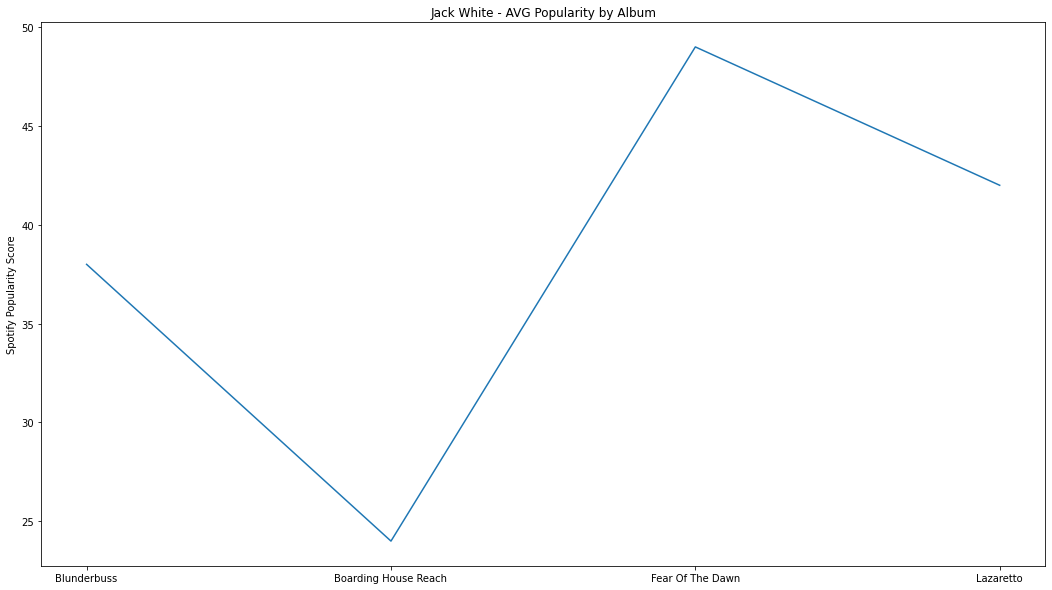

In [50]:
plt.figure(figsize=(18,10))  
plt.title("Jack White - AVG Popularity by Album")
plt.plot(jack_white_df.groupby(jack_white_df["Album"]).agg({'Popularity': ['median']}))
plt.ylabel('Spotify Popularity Score');

# The Dead Weather and The Raconteurs

In [51]:
playlist = sp.user_playlist_tracks(user="kakkia", playlist_id="spotify:playlist:38PLi3WmFBs2Ay3JK7E8ew")

In [53]:
tracks = []

for track in playlist["items"]:
    track_dict = {}
    track_dict["Title"] = track["track"]["name"]
    track_dict["Album"] = track["track"]["album"]["name"]
    track_dict["Artist"] = track["track"]["artists"][0]["name"]
    track_dict["Popularity"] = track["track"]["popularity"]
    track_dict['Date'] = track["track"]["album"]["release_date"]
    track_dict['Audio Description'] = sp.audio_features(track['track']['id'])
    tracks.append(track_dict)

In [54]:
tracks_raw = pd.DataFrame(tracks)
tracks_raw.head(3)

,Title,Album,Artist,Popularity,Date,Audio Description
0,Blue Blood Blues,Sea of Cowards,The Dead Weather,46,2010-05-07,"[{'danceability': 0.547, 'energy': 0.943, 'key..."
1,Hustle and Cuss,Sea of Cowards,The Dead Weather,45,2010-05-07,"[{'danceability': 0.483, 'energy': 0.89, 'key'..."
2,The Difference Between Us,Sea of Cowards,The Dead Weather,40,2010-05-07,"[{'danceability': 0.33, 'energy': 0.98, 'key':..."


In [55]:
def gimme_first(x):
    return x[0]

df_dwr = pd.json_normalize(tracks_raw['Audio Description'].apply(gimme_first))

In [57]:
dead_weather_raconteurs_df = pd.merge(tracks_raw, df_dwr, left_index=True, right_index=True)

In [58]:
dead_weather_raconteurs_df.drop(['Audio Description', 'id', 'type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [62]:
dead_weather_raconteurs_df['Artist'].value_counts()

The Raconteurs      36
The Dead Weather    34
Name: Artist, dtype: int64

In [63]:
dead_weather_raconteurs_df['Album'].value_counts()

Consolers of the Lonely    14
Dodge And Burn             12
Help Us Stranger           12
Sea of Cowards             11
Horehound                  11
Broken Boy Soldiers        10
Name: Album, dtype: int64

In [67]:
dead_weather_df = dead_weather_raconteurs_df[dead_weather_raconteurs_df['Artist'] == 'The Dead Weather']

In [68]:
dead_weather_df['Album'].value_counts()

Dodge And Burn    12
Horehound         11
Sea of Cowards    11
Name: Album, dtype: int64

In [70]:
raconteurs_df = dead_weather_raconteurs_df[dead_weather_raconteurs_df['Artist'] == 'The Raconteurs']

In [71]:
raconteurs_df['Album'].value_counts()

Consolers of the Lonely    14
Help Us Stranger           12
Broken Boy Soldiers        10
Name: Album, dtype: int64

In [72]:
dead_weather_df.sort_values('Popularity', ascending=False).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5,I Can't Hear You,Sea of Cowards,The Dead Weather,49,2010-05-07,0.529,0.754,0,-3.167,0,0.1820,0.04820,0.005980,0.1080,0.422,79.463,215093,4
11,I Feel Love (Every Million Miles),Dodge And Burn,The Dead Weather,48,2015-09-25,0.242,0.854,4,-6.960,1,0.1250,0.00209,0.000000,0.1500,0.325,188.680,195827,4
0,Blue Blood Blues,Sea of Cowards,The Dead Weather,46,2010-05-07,0.547,0.943,2,-2.502,1,0.2440,0.00463,0.007890,0.6850,0.515,92.262,202307,4
25,I Cut Like a Buffalo,Horehound,The Dead Weather,45,2009-07-13,0.503,0.855,9,-5.585,0,0.1880,0.16600,0.131000,0.0606,0.547,88.174,207640,4
1,Hustle and Cuss,Sea of Cowards,The Dead Weather,45,2010-05-07,0.483,0.890,9,-3.378,1,0.1960,0.05270,0.029900,0.2480,0.494,89.658,225653,4
27,Treat Me Like Your Mother,Horehound,The Dead Weather,44,2009-07-13,0.355,0.953,7,-3.035,1,0.0972,0.01120,0.001720,0.1450,0.205,99.856,250307,4
2,The Difference Between Us,Sea of Cowards,The Dead Weather,40,2010-05-07,0.330,0.980,9,-2.043,1,0.1270,0.00835,0.000000,0.8100,0.202,117.249,217320,4
23,60 Feet Tall,Horehound,The Dead Weather,40,2009-07-13,0.495,0.655,0,-8.629,1,0.1180,0.20100,0.063700,0.1530,0.282,78.063,333400,4
33,Will There Be Enough Water?,Horehound,The Dead Weather,39,2009-07-13,0.385,0.442,7,-11.920,1,0.0337,0.81800,0.084700,0.1150,0.385,174.329,380160,3
4,Die by the Drop,Sea of Cowards,The Dead Weather,38,2010-05-07,0.447,0.929,2,-2.888,1,0.0457,0.00507,0.000333,0.1270,0.555,105.655,209213,4


In [73]:
dead_weather_df.sort_values('Popularity', ascending=True).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
21,Too Bad,Dodge And Burn,The Dead Weather,24,2015-09-25,0.418,0.972,4,-5.983,0,0.1650,0.00788,0.104000,0.0836,0.246,118.187,227120,4
19,Mile Markers,Dodge And Burn,The Dead Weather,24,2015-09-25,0.418,0.857,2,-5.895,1,0.1340,0.23000,0.000011,0.3730,0.545,133.151,226640,4
18,Be Still,Dodge And Burn,The Dead Weather,25,2015-09-25,0.418,0.675,7,-9.365,1,0.0737,0.13800,0.000016,0.0763,0.449,129.623,168160,4
17,Open Up,Dodge And Burn,The Dead Weather,26,2015-09-25,0.365,0.792,9,-7.247,1,0.0716,0.10200,0.000065,0.3250,0.192,139.300,230947,4
32,No Hassle Night,Horehound,The Dead Weather,26,2009-07-13,0.377,0.930,4,-5.045,1,0.1040,0.00208,0.000252,0.1410,0.328,79.465,171707,4
15,Lose The Right,Dodge And Burn,The Dead Weather,26,2015-09-25,0.361,0.793,5,-6.944,1,0.0680,0.05120,0.000035,0.0910,0.577,147.847,198453,4
20,Cop and Go,Dodge And Burn,The Dead Weather,26,2015-09-25,0.464,0.941,4,-7.800,0,0.1660,0.06620,0.000008,0.3130,0.110,171.434,247093,4
8,Looking at the Invisible Man,Sea of Cowards,The Dead Weather,26,2010-05-07,0.509,0.960,5,-2.397,1,0.1190,0.00103,0.000903,0.5370,0.534,89.258,162027,4
10,Old Mary,Sea of Cowards,The Dead Weather,27,2010-05-07,0.518,0.858,2,-5.016,1,0.0497,0.40900,0.044900,0.3220,0.358,120.941,172987,4
30,Bone House,Horehound,The Dead Weather,27,2009-07-13,0.531,0.894,7,-5.487,1,0.1340,0.00756,0.003410,0.0834,0.226,123.611,206800,4


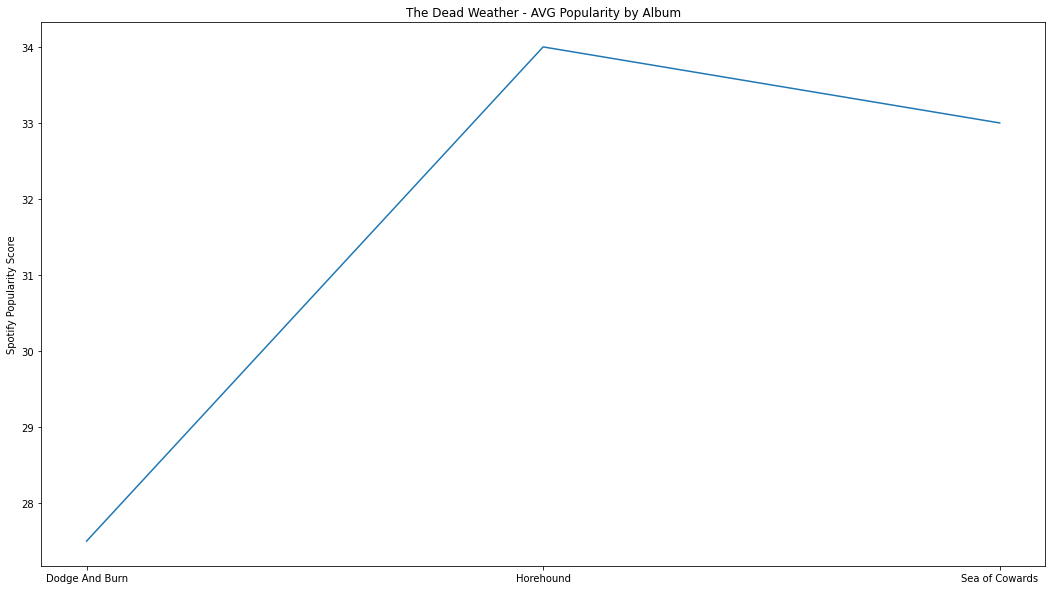

In [76]:
plt.figure(figsize=(18,10))  
plt.title("The Dead Weather - AVG Popularity by Album")
plt.plot(dead_weather_df.groupby(dead_weather_df["Album"]).agg({'Popularity': ['median']}))
plt.ylabel('Spotify Popularity Score');

In [74]:
raconteurs_df.sort_values('Popularity', ascending=False).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
34,"Steady, As She Goes",Broken Boy Soldiers,The Raconteurs,70,2006-05-15,0.525,0.578,9,-4.563,1,0.1200,0.013200,0.009160,0.108,0.5370,123.696,215267,4
45,Salute Your Solution,Consolers of the Lonely,The Raconteurs,61,2008-03-25,0.266,0.946,9,-2.855,1,0.1710,0.007810,0.000003,0.260,0.4980,168.465,179973,4
39,Level,Broken Boy Soldiers,The Raconteurs,56,2006-05-15,0.519,0.666,1,-9.732,1,0.0645,0.101000,0.346000,0.118,0.2740,146.467,141160,4
44,Consoler of the Lonely,Consolers of the Lonely,The Raconteurs,54,2008-03-25,0.408,0.821,0,-4.987,1,0.0648,0.019300,0.000002,0.360,0.6090,99.814,205587,4
57,Carolina Drama,Consolers of the Lonely,The Raconteurs,52,2008-03-25,0.365,0.689,9,-5.893,0,0.0907,0.284000,0.000000,0.130,0.3940,165.648,355000,4
43,Blue Veins,Broken Boy Soldiers,The Raconteurs,49,2006-05-15,0.373,0.434,4,-9.361,0,0.0449,0.193000,0.005540,0.134,0.0793,130.702,232493,3
47,Old Enough,Consolers of the Lonely,The Raconteurs,49,2008-03-25,0.332,0.799,7,-5.230,1,0.0440,0.000156,0.000194,0.212,0.4620,88.804,237373,4
50,Top Yourself,Consolers of the Lonely,The Raconteurs,48,2008-03-25,0.505,0.727,7,-5.390,1,0.0580,0.197000,0.000819,0.082,0.2570,85.902,265507,4
51,Many Shades of Black,Consolers of the Lonely,The Raconteurs,47,2008-03-25,0.408,0.728,7,-4.287,0,0.0340,0.019700,0.000000,0.462,0.6320,95.429,264627,3
46,You Don't Understand Me,Consolers of the Lonely,The Raconteurs,47,2008-03-25,0.348,0.717,9,-6.587,1,0.0410,0.116000,0.006750,0.124,0.2420,143.110,293733,4


In [75]:
raconteurs_df.sort_values('Popularity', ascending=True).head(10)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
69,Thoughts And Prayers,Help Us Stranger,The Raconteurs,19,2019-06-21,0.413,0.563,7,-9.540,1,0.0335,0.379000,0.006470,0.0880,0.135,150.530,282376,4
68,What's Yours Is Mine,Help Us Stranger,The Raconteurs,19,2019-06-21,0.456,0.770,9,-6.083,1,0.0855,0.006850,0.134000,0.0960,0.483,107.481,169022,4
67,Live A Lie,Help Us Stranger,The Raconteurs,19,2019-06-21,0.335,0.818,9,-6.753,1,0.0536,0.000025,0.000000,0.1240,0.359,140.631,140807,4
64,Hey Gyp (Dig The Slowness),Help Us Stranger,The Raconteurs,20,2019-06-21,0.505,0.776,7,-7.534,1,0.1470,0.000161,0.001950,0.2230,0.345,112.682,145446,4
61,Don't Bother Me,Help Us Stranger,The Raconteurs,21,2019-06-21,0.289,0.906,9,-8.415,1,0.1590,0.001830,0.000501,0.3440,0.399,139.677,173634,4
62,Shine The Light On Me,Help Us Stranger,The Raconteurs,21,2019-06-21,0.437,0.541,9,-9.203,1,0.0317,0.109000,0.001730,0.0827,0.150,98.529,207636,4
65,Sunday Driver,Help Us Stranger,The Raconteurs,22,2019-06-21,0.436,0.766,9,-6.353,1,0.1120,0.005120,0.000939,0.3350,0.331,122.427,218806,4
60,Only Child,Help Us Stranger,The Raconteurs,23,2019-06-21,0.593,0.520,7,-8.980,1,0.0259,0.052400,0.002940,0.1410,0.373,73.458,221082,4
63,Somedays (I Don't Feel Like Trying),Help Us Stranger,The Raconteurs,23,2019-06-21,0.288,0.608,0,-6.932,1,0.0345,0.016700,0.000121,0.1020,0.412,168.392,246376,3
59,Help Me Stranger,Help Us Stranger,The Raconteurs,24,2019-06-21,0.507,0.784,4,-7.726,0,0.0663,0.031800,0.000089,0.0857,0.195,95.014,216292,4


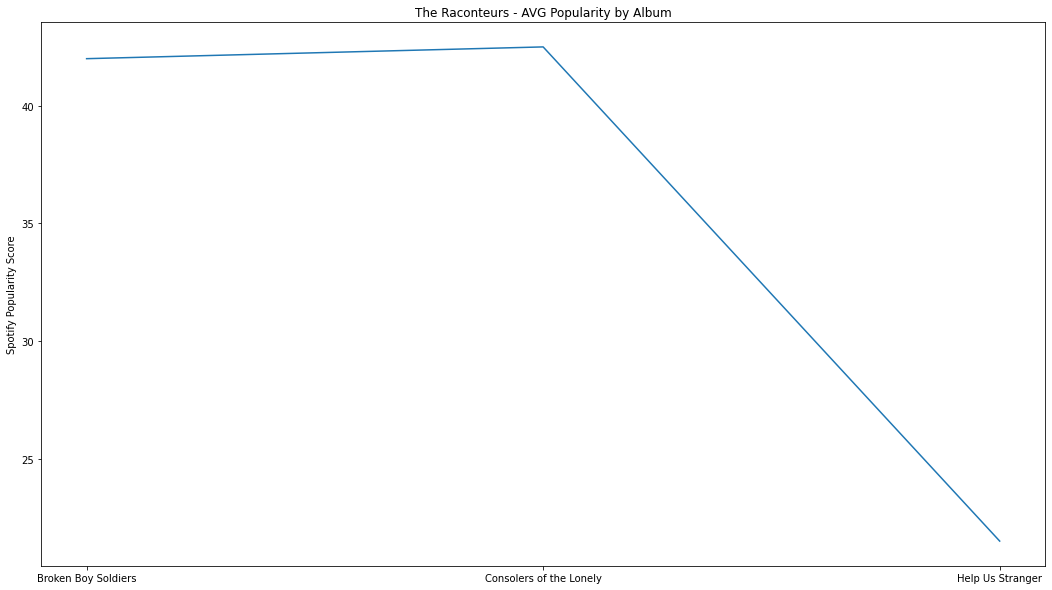

In [77]:
plt.figure(figsize=(18,10))  
plt.title("The Raconteurs - AVG Popularity by Album")
plt.plot(raconteurs_df.groupby(raconteurs_df["Album"]).agg({'Popularity': ['median']}))
plt.ylabel('Spotify Popularity Score');

# Merging the datasets 

In [79]:
df = pd.concat([white_stripes_df, dead_weather_df, raconteurs_df, jack_white_df])

In [82]:
df.columns

Index(['Title', 'Album', 'Artist', 'Popularity', 'Date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 48
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             205 non-null    object 
 1   Album             205 non-null    object 
 2   Artist            205 non-null    object 
 3   Popularity        205 non-null    int64  
 4   Date              205 non-null    object 
 5   danceability      205 non-null    float64
 6   energy            205 non-null    float64
 7   key               205 non-null    int64  
 8   loudness          205 non-null    float64
 9   mode              205 non-null    int64  
 10  speechiness       205 non-null    float64
 11  acousticness      205 non-null    float64
 12  instrumentalness  205 non-null    float64
 13  liveness          205 non-null    float64
 14  valence           205 non-null    float64
 15  tempo             205 non-null    float64
 16  duration_ms       205 non-null    int64  
 17

# Transforming date into datetime 

In [85]:
df['Date'] = pd.to_datetime(df['Date'])

In [89]:
df['Date'] = df['Date'].dt.year